# Building Trees using scikit-learn

## Introduction

In this lesson, we will cover decision trees (for classification) in Python, using scikit-learn and pandas. The emphasis will be on the basics and understanding the resulting decision tree. Scikit-learn provides a consistent interface for running different classifiers/regressors. For classification tasks, evaluation is performed using the same measures as we have seen before. Let's look at our example from earlier lessons and grow a tree to find our solution. 

## Objectives 

You will be able to:

- Use scikit-learn to fit a decision tree classification model 
- Plot a decision tree using Python 


## Import necessary modules and data

In order to prepare data, train, evaluate, and visualize a decision tree, we will make use of several modules in the scikit-learn package. Run the cell below to import everything we'll need for this lesson: 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

The play tennis dataset is available in the repo as `'tennis.csv'`. For this step, we'll start by importing the csv file as a pandas DataFrame.

In [2]:
# Load the dataset
df = pd.read_csv('tennis.csv')

df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


## Create training and test sets

Before we do anything we'll want to split our data into **_training_** and **_test_** sets.  We'll accomplish this by first splitting the DataFrame into features (`X`) and target (`y`), then passing `X` and `y` to the `train_test_split()` function to split the data so that 70% of it is in the training set, and 30% of it is in the testing set.

In [3]:
X = df[['outlook', 'temp', 'humidity', 'windy']]
y = df[['play']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Encode categorical data as numbers

Since all of our data is currently categorical (recall that each column is in string format), we need to encode them as numbers. For this, we'll use a handy helper object from sklearn's `preprocessing` module called `OneHotEncoder`.

In [17]:
# One-hot encode the training data and show the resulting DataFrame with proper column names
ohe = OneHotEncoder()

ohe.fit(X_train)
X_train_ohe = ohe.transform(X_train).toarray()

# Creating this DataFrame is not necessary its only to show the result of the ohe
ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names_out(X_train.columns))

ohe_df.head()

,outlook_overcast,outlook_rainy,outlook_sunny,temp_cool,temp_hot,temp_mild,humidity_high,humidity_normal,windy_False,windy_True
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


## Train the decision tree 

One awesome feature of scikit-learn is the uniformity of its interfaces for every classifier -- no matter what classifier we're using, we can expect it to have the same important methods such as `.fit()` and `.predict()`. This means that this next part should feel familiar.

We'll first create an instance of the classifier with any parameter values we have, and then we'll fit our data to the model using `.fit()`. 

In [18]:
# Create the classifier, fit it on the training data and make predictions on the test set
clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train_ohe, y_train)

DecisionTreeClassifier(criterion='entropy')

## Plot the decision tree 

You can see what rules the tree learned by plotting this decision tree, using matplotlib and sklearn's `plot_tree` function.

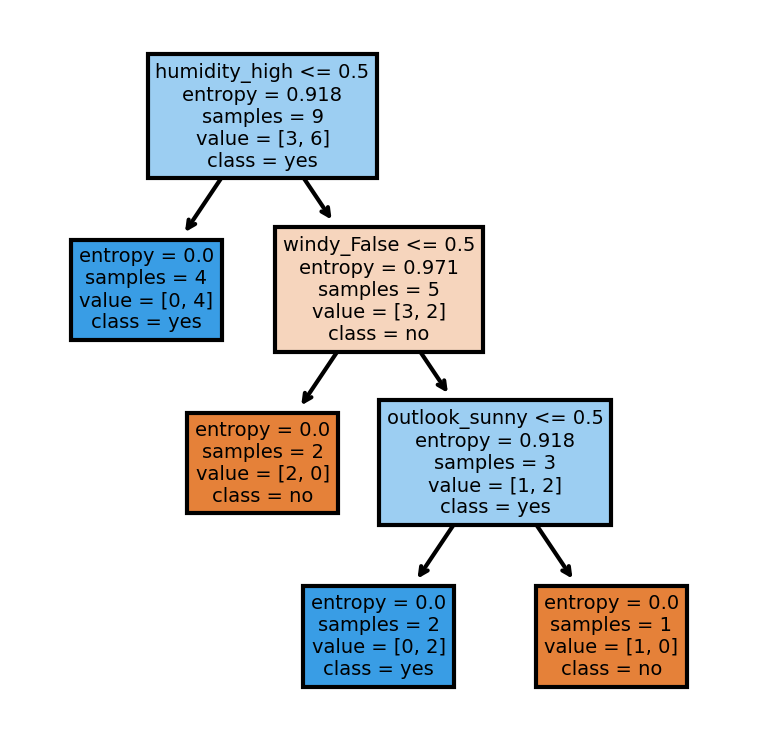

In [19]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (3,3), dpi=300)
tree.plot_tree(clf,
               feature_names = ohe_df.columns, 
               class_names = np.unique(y).astype('str'),
               filled = True)
plt.show()

## Evaluate the predictive performance

Now that we have a trained model, we can generate some predictions, and go on to see how accurate our predictions are. We can use a simple accuracy measure, AUC, a confusion matrix, or all of them. This step is performed in the exactly the same manner, so it doesn't matter which classifier you are dealing with. 

In [20]:
X_test_ohe = ohe.transform(X_test)
y_preds = clf.predict(X_test_ohe)

print('Accuracy: ', accuracy_score(y_test, y_preds))

Accuracy:  0.6


## Summary 

In this lesson, we looked at how to grow a decision tree using `scikit-learn`. We looked at different stages of data processing, training, and evaluation that you would normally come across while growing a tree or training any other such classifier. We shall now move to a lab, where you will be required to build a tree for a given problem, following the steps shown in this lesson. 